# 导包

In [30]:
# The usual train-test split mumbo-jumbo
from sklearn.datasets import load_digits, load_breast_cancer, load_iris, make_classification
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
# The magic happens here
import matplotlib.pyplot as plt
import scikitplot as skplt
import warnings

warnings.filterwarnings('ignore')

# 混淆矩阵

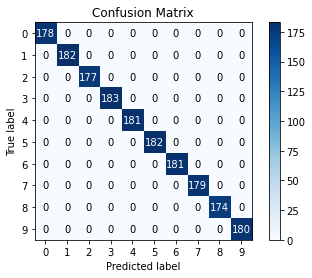

In [34]:
X, y = load_digits(return_X_y=True)
rf = RandomForestClassifier()
rf.fit(X, y)
preds = rf.predict(X)
skplt.metrics.plot_confusion_matrix(y_true=y, y_pred=preds)
plt.show()

# ROC曲线

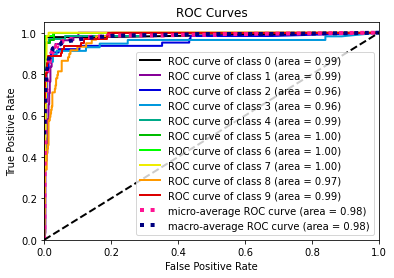

In [3]:

X, y = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
nb = GaussianNB()
nb.fit(X_train, y_train)
predicted_probas = nb.predict_proba(X_test)

skplt.metrics.plot_roc(y_test, predicted_probas)
plt.show()

# KS统计

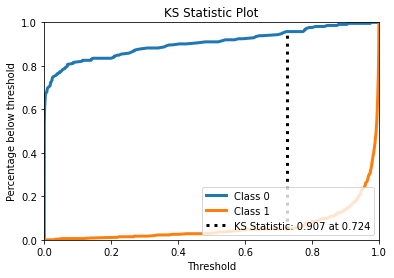

In [11]:
X, y = load_breast_cancer(return_X_y=True)
lr = LogisticRegression()
lr.fit(X, y)
probas = lr.predict_proba(X)
skplt.metrics.plot_ks_statistic(y_true=y, y_probas=probas)
plt.show()

# Precision-Recall

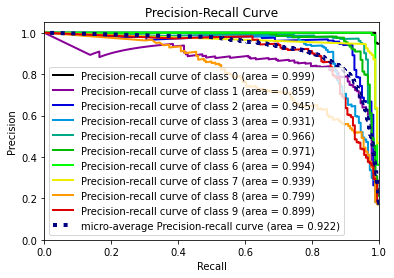

In [13]:
X, y = load_digits(return_X_y=True)
nb = GaussianNB()
nb.fit(X, y)
probas = nb.predict_proba(X)
skplt.metrics.plot_precision_recall(y_true=y, y_probas=probas)
plt.show()

# 聚类

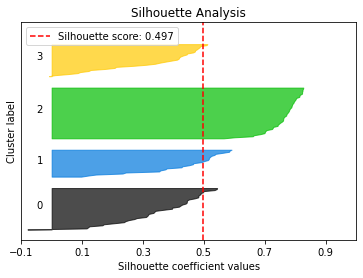

In [19]:
X, y = load_iris(return_X_y=True)
kmeans = KMeans(n_clusters=4, random_state=1)
cluster_labels = kmeans.fit_predict(X)
skplt.metrics.plot_silhouette(X, cluster_labels)
plt.show()

# Calibration Curve(校准曲线)

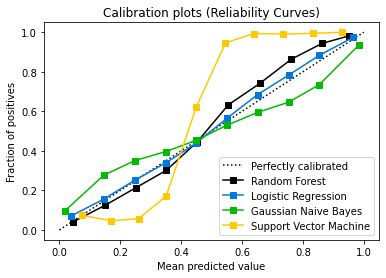

In [21]:
X, y = make_classification(n_samples=100000, n_features=20,
                           n_informative=2, n_redundant=2,
                           random_state=20)

X_train, y_train, X_test, y_test = X[:1000], y[:1000], X[1000:], y[1000:]

rf_probas = RandomForestClassifier().fit(X_train, y_train).predict_proba(X_test)
lr_probas = LogisticRegression().fit(X_train, y_train).predict_proba(X_test)
nb_probas = GaussianNB().fit(X_train, y_train).predict_proba(X_test)
sv_scores = LinearSVC().fit(X_train, y_train).decision_function(X_test)

probas_list = [rf_probas, lr_probas, nb_probas, sv_scores]
clf_names=['Random Forest',
           'Logistic Regression',
           'Gaussian Naive Bayes',
           'Support Vector Machine']

skplt.metrics.plot_calibration_curve(y_test,
                                     probas_list=probas_list,
                                     clf_names=clf_names,
                                     n_bins=10)
plt.show()

# Cumulative Gain(累计增益)

根据标签和分数/概率生成累积增益图

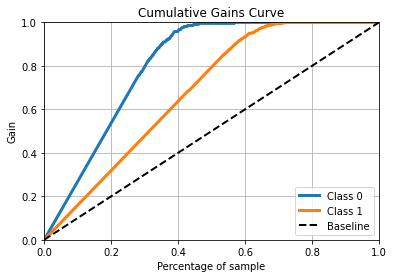

In [22]:
X, y = load_breast_cancer(return_X_y=True)
lr = LogisticRegression()
lr.fit(X, y)
probas = lr.predict_proba(X)
skplt.metrics.plot_cumulative_gain(y_true=y, y_probas=probas)
plt.show()

# Lift Curve(提升曲线)

从标签和分数/概率生成提升曲线

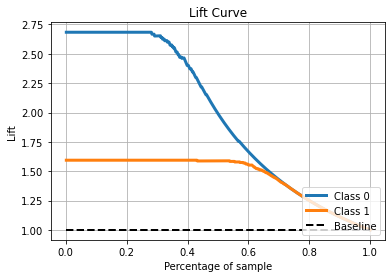

In [23]:
X, y = load_breast_cancer(return_X_y=True)
lr = LogisticRegression()
lr.fit(X, y)
probas = lr.predict_proba(X)
skplt.metrics.plot_lift_curve(y_true=y, y_probas=probas)
plt.show()

# Learning Curve(学习曲线)

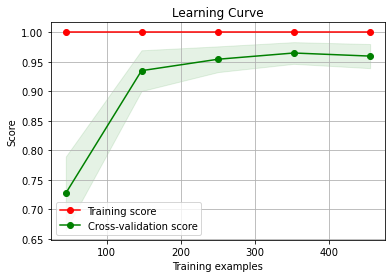

In [24]:
X, y = load_breast_cancer(return_X_y=True)
rf = RandomForestClassifier()
skplt.estimators.plot_learning_curve(rf, X, y)
plt.show()

# Feature Importances(特征重要性)

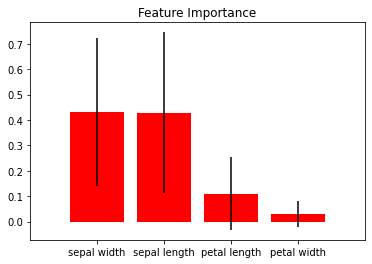

In [26]:
X, y = load_iris(return_X_y=True)
rf = RandomForestClassifier()
rf.fit(X, y)
skplt.estimators.plot_feature_importances(rf,
    feature_names=['petal length',
                    'petal width',
                    'sepal length',
                    'sepal width'])
plt.show()

# Elbow Curve

为 KMeans 聚类绘制不同 K 值的肘部曲线。

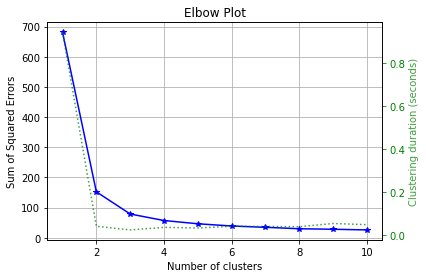

In [28]:
X, y = load_iris(return_X_y=True)
kmeans = KMeans(random_state=1)
skplt.cluster.plot_elbow_curve(kmeans, X, cluster_ranges=range(1, 11))
plt.show()

# PCA Component Variance

绘制 PCA 组件的解释方差比。

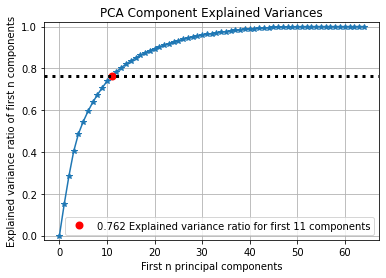

In [32]:
X, y = load_digits(return_X_y=True)
pca = PCA(random_state=1)
pca.fit(X)
skplt.decomposition.plot_pca_component_variance(pca)
plt.show()

# PCA 2d Projection

在给定数据集上绘制 PCA 的二维投影。

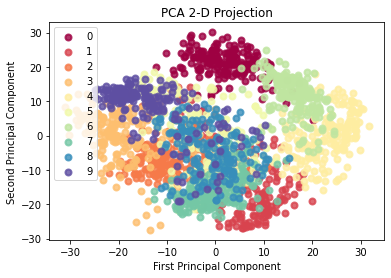

In [33]:
X, y = load_digits(return_X_y=True)
pca = PCA(random_state=1)
pca.fit(X)
skplt.decomposition.plot_pca_2d_projection(pca, X, y)
plt.show()